# **Tahap 1 : Analisis Data Eksploratif (EDA)**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objs as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

plt.style.use('seaborn-v0_8-darkgrid')
plt.style.context('grayscale')
%matplotlib inline

In [2]:
try:
    df = pd.read_csv("https://raw.githubusercontent.com/RizalShidiq/machine-learning/refs/heads/main/Bike%20Sharing%20Demand%20Prediction/Dataset/train.csv", sep=';') #
    print("CSV berhasil diimpor!")
except Exception as e:
    print(f"Error mengimpor CSV: {e}")
    df = None

if df is not None:
    print("\nDataset berhasil dimuat.")
    print("\nBeberapa baris pertama data:")
    print(df.head())
else:
    print("\nDataset tidak berhasil dimuat. Harap periksa path atau file.")

CSV berhasil diimpor!

Dataset berhasil dimuat.

Beberapa baris pertama data:
   id  year  hour  season  holiday  workingday  weather   temp   atemp  \
0   3  2012    23       3        0           0        2  23.78  27.275   
1   4  2011     8       3        0           0        1  27.88  31.820   
2   5  2012     2       1        0           1        1  20.50  24.240   
3   7  2011    20       3        0           1        3  25.42  28.790   
4   8  2011    17       3        0           1        3  26.24  28.790   

   humidity  windspeed  count  
0        73    11.0014    133  
1        57     0.0000    132  
2        59     0.0000     19  
3        83    19.9995     58  
4        89     0.0000    285  


**Pemahaman Data Awal dan Pra-pemrosesan Dasar**

In [3]:
if df is not None:
    print("Informasi Dataset Awal:")
    df.info()


    df['season'] = df['season'].astype('object')
    df.loc[(df['season'] == 1), 'season'] = 'winter'
    df.loc[(df['season'] == 2), 'season'] = 'spring'
    df.loc[(df['season'] == 3), 'season'] = 'summer'
    df.loc[(df['season'] == 4), 'season'] = 'autumn'

    df['weather'] = df['weather'].astype('object')
    df.loc[(df['weather'] == 1), 'weather'] = 'good'
    df.loc[(df['weather'] == 2), 'weather'] = 'moderate'
    df.loc[(df['weather'] == 3), 'weather'] = 'bad'
    df.loc[(df['weather'] == 4), 'weather'] = 'worst'

Informasi Dataset Awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7689 entries, 0 to 7688
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          7689 non-null   int64  
 1   year        7689 non-null   int64  
 2   hour        7689 non-null   int64  
 3   season      7689 non-null   int64  
 4   holiday     7689 non-null   int64  
 5   workingday  7689 non-null   int64  
 6   weather     7689 non-null   int64  
 7   temp        7689 non-null   float64
 8   atemp       7689 non-null   float64
 9   humidity    7689 non-null   int64  
 10  windspeed   7689 non-null   float64
 11  count       7689 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 721.0 KB


In [4]:
print("Beberapa baris pertama data setelah transformasi awal:")
print(df.head())

Beberapa baris pertama data setelah transformasi awal:
   id  year  hour  season  holiday  workingday   weather   temp   atemp  \
0   3  2012    23  summer        0           0  moderate  23.78  27.275   
1   4  2011     8  summer        0           0      good  27.88  31.820   
2   5  2012     2  winter        0           1      good  20.50  24.240   
3   7  2011    20  summer        0           1       bad  25.42  28.790   
4   8  2011    17  summer        0           1       bad  26.24  28.790   

   humidity  windspeed  count  
0        73    11.0014    133  
1        57     0.0000    132  
2        59     0.0000     19  
3        83    19.9995     58  
4        89     0.0000    285  


In [5]:
print("Informasi Dataset Setelah Transformasi Awal:")
df.info()

Informasi Dataset Setelah Transformasi Awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7689 entries, 0 to 7688
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          7689 non-null   int64  
 1   year        7689 non-null   int64  
 2   hour        7689 non-null   int64  
 3   season      7689 non-null   object 
 4   holiday     7689 non-null   int64  
 5   workingday  7689 non-null   int64  
 6   weather     7689 non-null   object 
 7   temp        7689 non-null   float64
 8   atemp       7689 non-null   float64
 9   humidity    7689 non-null   int64  
 10  windspeed   7689 non-null   float64
 11  count       7689 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 721.0+ KB


In [6]:
print("Statistik Deskriptif untuk Fitur Numerik:")
print(df.describe())

Statistik Deskriptif untuk Fitur Numerik:
                 id         year         hour      holiday   workingday  \
count   7689.000000  7689.000000  7689.000000  7689.000000  7689.000000   
mean    5463.266224  2011.495513    11.565353     0.029002     0.677331   
std     3144.709810     0.500012     6.915777     0.167824     0.467528   
min        3.000000  2011.000000     0.000000     0.000000     0.000000   
25%     2771.000000  2011.000000     6.000000     0.000000     0.000000   
50%     5477.000000  2011.000000    12.000000     0.000000     1.000000   
75%     8186.000000  2012.000000    18.000000     0.000000     1.000000   
max    10886.000000  2012.000000    23.000000     1.000000     1.000000   

              temp        atemp     humidity    windspeed        count  
count  7689.000000  7689.000000  7689.000000  7689.000000  7689.000000  
mean     20.267085    23.696581    61.771492    12.802070   191.419430  
std       7.824066     8.514199    19.302151     8.178889   182

Jumlah Nilai Hilang per Kolom:
id            0
year          0
hour          0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

Visualisasi Nilai Hilang:


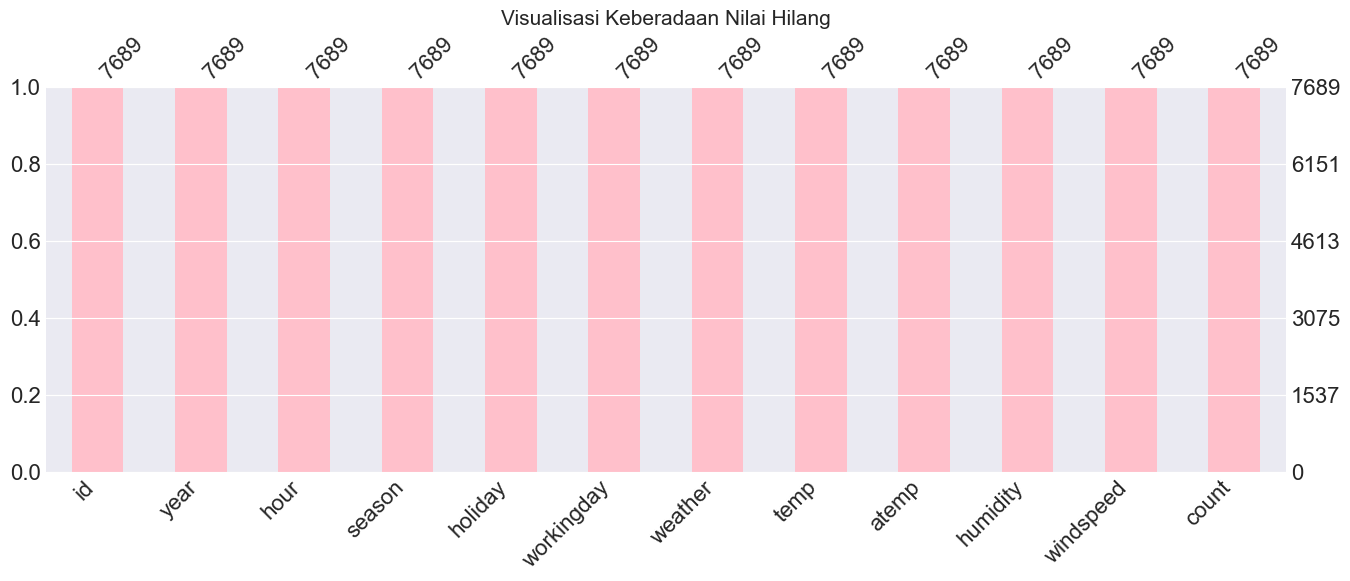

In [7]:
print("Jumlah Nilai Hilang per Kolom:")
print(df.isnull().sum())

print("\nVisualisasi Nilai Hilang:")
msno.bar(df, figsize=(16, 5), color="pink")
plt.title('Visualisasi Keberadaan Nilai Hilang', fontsize=15)
plt.show()

**Visualisasi Data**

Distribusi Jumlah Data per Tahun:
year
2011    3879
2012    3810
Name: count, dtype: int64


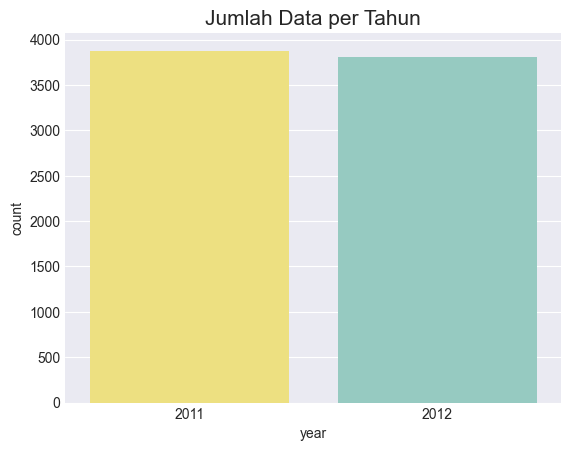

In [8]:
if df is not None:
    print("Distribusi Jumlah Data per Tahun:")
    print(df.year.value_counts())
    sns.countplot(data=df, x="year", hue="year", palette="Set3_r", legend=False)
    plt.title('Jumlah Data per Tahun', fontsize=15)
    plt.show()

Distribusi Jumlah Data per Musim:
season
summer    1943
autumn    1925
spring    1920
winter    1901
Name: count, dtype: int64


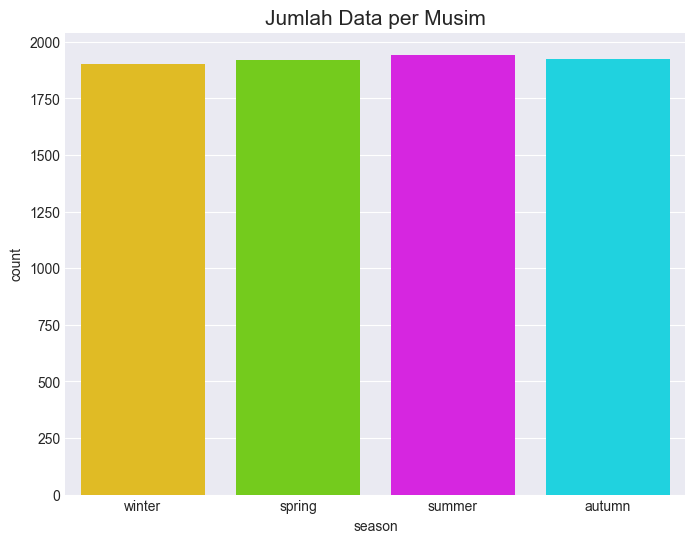

In [9]:
print("Distribusi Jumlah Data per Musim:")
print(df.season.value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="season", hue="season", palette="gist_ncar_r", legend=False, order=['winter', 'spring', 'summer', 'autumn'])
plt.title('Jumlah Data per Musim', fontsize=15)
plt.show()

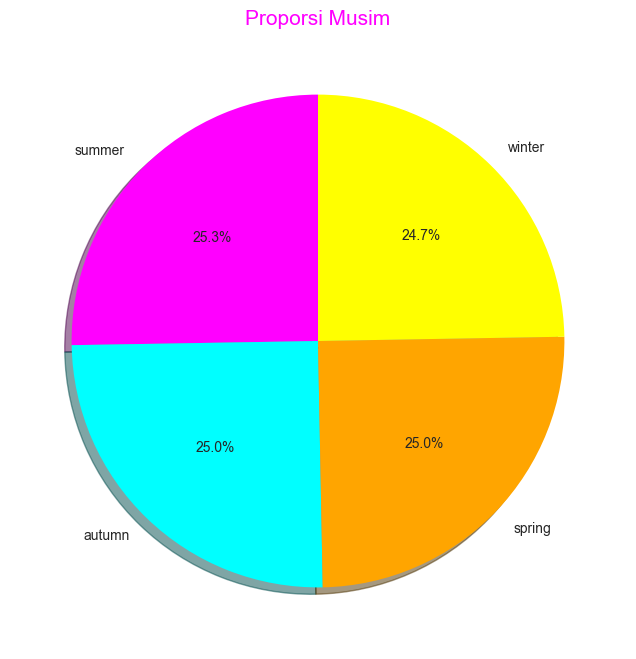

In [10]:
labels = df["season"].value_counts().index
sizes = df["season"].value_counts().values
colors = ['magenta', 'cyan', "orange", "yellow"]
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
plt.title('Proporsi Musim', color = 'magenta', fontsize = 15)
plt.show()

Distribusi Jumlah Data per Kondisi Cuaca:
weather
good        5122
moderate    1981
bad          586
Name: count, dtype: int64


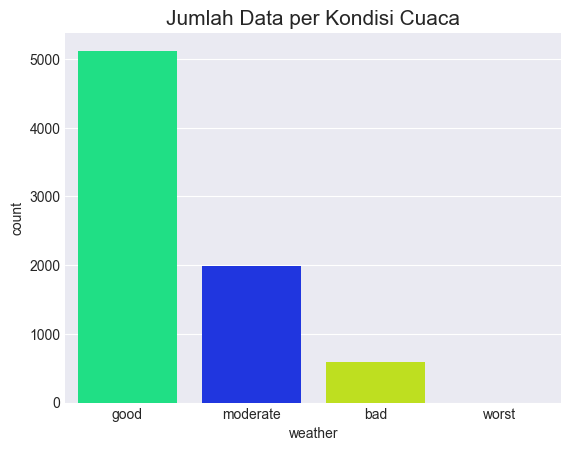

In [11]:
print("Distribusi Jumlah Data per Kondisi Cuaca:")
print(df.weather.value_counts())
sns.countplot(data=df, x="weather", hue="weather", palette="gist_rainbow_r", legend=False, order=['good', 'moderate', 'bad', 'worst'])
plt.title('Jumlah Data per Kondisi Cuaca', fontsize=15)
plt.show()

Distribusi Jumlah Data per Jam:
hour
0     309
1     333
2     320
3     303
4     311
5     316
6     329
7     312
8     313
9     300
10    326
11    335
12    325
13    319
14    332
15    313
16    323
17    343
18    318
19    326
20    319
21    310
22    326
23    328
Name: count, dtype: int64


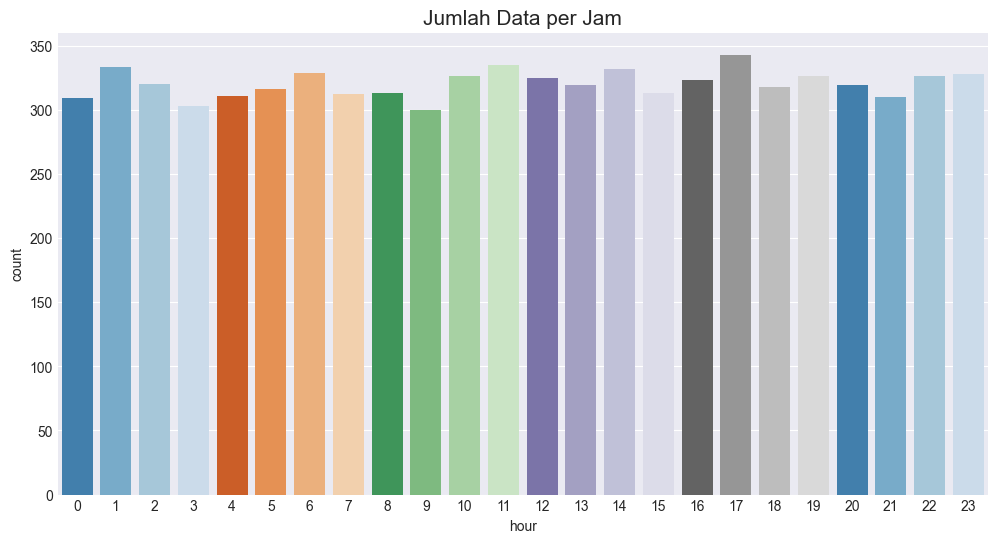

In [12]:
print("Distribusi Jumlah Data per Jam:")
print(df.hour.value_counts().sort_index())
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="hour", hue="hour", palette="tab20c", legend=False)
plt.title('Jumlah Data per Jam', fontsize=15)
plt.show()

In [13]:
fig_season_count = px.box(df, x='season', y='count', color='season', template='ggplot2',
                          labels={'season': 'Musim', 'count': 'Jumlah Sewa'},
                          title='<b>Distribusi Jumlah Sewa Sepeda per Musim</b>',
                          category_orders={"season": ["winter", "spring", "summer", "autumn"]})
fig_season_count.show()

In [14]:
fig_hour_count = px.histogram(df, x="hour", y="count", color="hour", barmode="relative",
                             marginal="rug", title="<b>Jumlah Sewa Sepeda per Jam</b>")
fig_hour_count.update_layout(bargap=0.1)
fig_hour_count.show()

In [15]:
fig_workingday_count = px.histogram(df, x="workingday", y="count", color_discrete_sequence=["#ff00ff"],
                                    title="<b>Tarif Sewa pada Hari Kerja (0=Libur/Akhir Pekan, 1=Hari Kerja)</b>")
fig_workingday_count.update_layout(bargap=0.3, font=dict(family="PT Sans", size=14))
fig_workingday_count.update_traces(marker=dict(line=dict(width=1.5, color="#333333")))
fig_workingday_count.show()

In [16]:
fig_holiday_count = px.strip(df, x='holiday', y='count', color="holiday",
                             title="<b>Jumlah Sewa pada Hari Libur (0=Bukan Hari Libur, 1=Hari Libur)</b>")
fig_holiday_count.show()

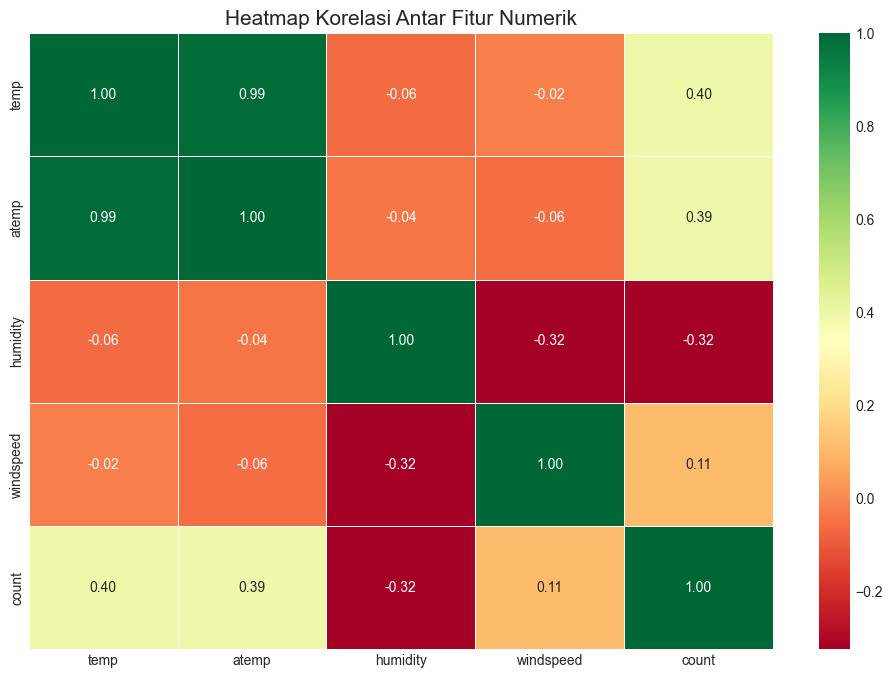

In [17]:
numerical_cols_for_corr = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols_for_corr].corr(), annot=True, cmap='RdYlGn', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi Antar Fitur Numerik', fontsize=15)
plt.show()

# **Tahap 2 : Pra-pemrosesan Data**

In [ ]:
# Membuang 'id' dan 'atemp' (karena korelasi tinggi dengan 'temp')
df_processed = df.drop(['id', 'atemp'], axis=1)

# Memisahkan Fitur (X) dan Target (y)
X = df_processed.drop('count', axis=1)
y = df_processed['count']

# Identifikasi Fitur Kategorikal dan Numerik
categorical_features = ['season', 'weather', 'year', 'hour', 'holiday', 'workingday']
numerical_features = ['temp', 'humidity', 'windspeed']

# Pembagian Data menjadi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat Pipa Pra-pemrosesan
# Untuk fitur numerik: Penskalaan StandardScaler
# Untuk fitur kategorikal: One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Tampilkan hasil pra-pemrosesan (opsional, untuk verifikasi)
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)
print(f"Shape X_train setelah pra-pemrosesan: {X_train_prepared.shape}")
print(f"Shape X_test setelah pra-pemrosesan: {X_test_prepared.shape}")

Shape X_train setelah pra-pemrosesan: (6151, 40)
Shape X_test setelah pra-pemrosesan: (1538, 40)


# **Tahap 3: Pemilihan dan Pelatihan Model**

In [19]:
# --- A. Linear Regression ---
print("Memulai pelatihan model Linear Regression...")
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())
                          ])
lr_model.fit(X_train, y_train)
print("Pelatihan model Linear Regression selesai.")

Memulai pelatihan model Linear Regression...
Pelatihan model Linear Regression selesai.


In [20]:
# --- B. Random Forest Regressor ---
print("Memulai pelatihan model Random Forest Regressor...")
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=20, min_samples_split=5, min_samples_leaf=5))
                          ])
rf_model.fit(X_train, y_train)
print("Pelatihan model Random Forest Regressor selesai.")

Memulai pelatihan model Random Forest Regressor...
Pelatihan model Random Forest Regressor selesai.


In [21]:
# --- C. XGBoost Regressor ---
print("Memulai pelatihan model XGBoost Regressor...")
xgb_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=5, learning_rate=0.1, subsample=0.8))
                           ])
xgb_model.fit(X_train, y_train)
print("Pelatihan model XGBoost Regressor selesai.")

Memulai pelatihan model XGBoost Regressor...
Pelatihan model XGBoost Regressor selesai.


# **Tahap 4: Evaluasi Model**

In [22]:
# A. Prediksi dengan Linear Regression
y_pred_lr = lr_model.predict(X_test)

# B. Prediksi dengan Random Forest Regressor
y_pred_rf = rf_model.predict(X_test) #

# C. Prediksi dengan XGBoost Regressor
y_pred_xgb = xgb_model.predict(X_test)

In [23]:
# A. Evaluasi Linear Regression
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("--- Hasil Evaluasi Linear Regression ---")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"R-squared (R2): {r2_lr:.4f}")

--- Hasil Evaluasi Linear Regression ---
Mean Absolute Error (MAE): 75.03
Mean Squared Error (MSE): 10363.98
Root Mean Squared Error (RMSE): 101.80
R-squared (R2): 0.6890


In [24]:
# B. Evaluasi Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf) #
mse_rf = mean_squared_error(y_test, y_pred_rf) #
rmse_rf = np.sqrt(mse_rf) #
r2_rf = r2_score(y_test, y_pred_rf) #

print("--- Hasil Evaluasi Random Forest Regressor ---") #
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}") #
print(f"Mean Squared Error (MSE): {mse_rf:.2f}") #
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}") #
print(f"R-squared (R2): {r2_rf:.4f}") #

--- Hasil Evaluasi Random Forest Regressor ---
Mean Absolute Error (MAE): 43.86
Mean Squared Error (MSE): 4240.54
Root Mean Squared Error (RMSE): 65.12
R-squared (R2): 0.8728


In [25]:
# C. Evaluasi XGBoost Regressor
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("--- Hasil Evaluasi XGBoost Regressor ---")
print(f"Mean Absolute Error (MAE): {mae_xgb:.2f}")
print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R-squared (R2): {r2_xgb:.4f}")

--- Hasil Evaluasi XGBoost Regressor ---
Mean Absolute Error (MAE): 39.89
Mean Squared Error (MSE): 3444.20
Root Mean Squared Error (RMSE): 58.69
R-squared (R2): 0.8967
